In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import matplotlib.ticker as mtick

# 1. Public Sentiment Impact: Product Rating vs Sales

### The dataset used is The dataset used is "Grocery Dataset" from Kaggle
#### https://www.kaggle.com/datasets/elvinrustam/grocery-dataset


#### The code extracts ratings, review-based sales estimates, and cleans product titles, groups them by rating range, calculates average sales per range, and visualizes the results.

C:\Users\abdul\AppData\Local\Temp\ipykernel_27324\1001333905.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_per_bin = df.groupby('Rating Bin')['Estimated Sales'].mean().reset_index()


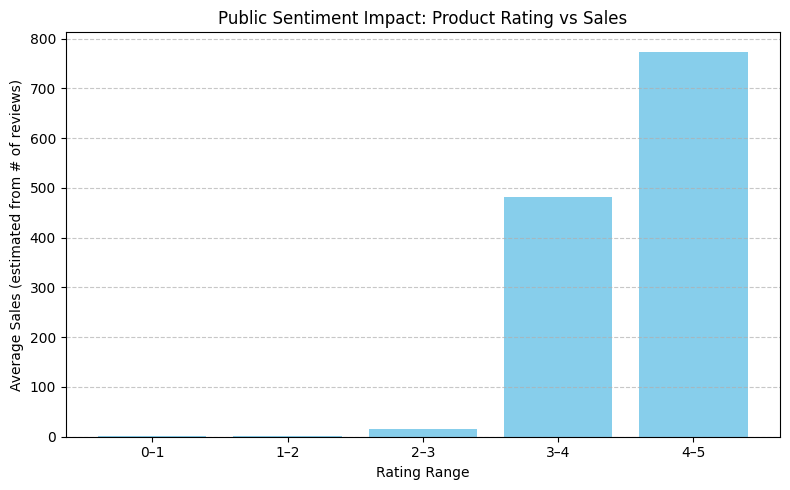

In [3]:
df = pd.read_csv("GroceryDataset.csv")

def extract_rating(text):
    match = re.search(r'Rated (\d+(\.\d+)?) out of 5', str(text))
    return float(match.group(1)) if match else None

def extract_reviews(text):
    match = re.search(r'based on (\d+) reviews', str(text))
    return int(match.group(1)) if match else 0

def clean_title(text):
    return re.sub(r'\s*\([^)]*\)', '', str(text)).strip()

df['Cleaned Rating'] = df['Rating'].apply(extract_rating)
df['Estimated Sales'] = df['Rating'].apply(extract_reviews)
df['Cleaned Title'] = df['Title'].apply(clean_title)

rating_bins = [0, 1, 2, 3, 4, 5]
df['Rating Bin'] = pd.cut(df['Cleaned Rating'], bins=rating_bins, labels=['0–1', '1–2', '2–3', '3–4', '4–5'])

avg_sales_per_bin = df.groupby('Rating Bin')['Estimated Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(avg_sales_per_bin['Rating Bin'], avg_sales_per_bin['Estimated Sales'], color='skyblue')
plt.xlabel('Rating Range')
plt.ylabel('Average Sales (estimated from # of reviews)')
plt.title('Public Sentiment Impact: Product Rating vs Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Walmart vs Costco - U.S. Revenue & Marketing Spend Comparison

### The dataset used is created from the company's 10-K filings.
#### The dataset has been uploaded to kaggle - https://www.kaggle.com/datasets/abdulkkhayyum519/walmart-and-costco-revenue-marketing-and-market-share/data?select=Walmart_Costco_US_Market_Share_2016_2024.csv

#### The code reads revenue and marketing spend data for Walmart and Costco, merges them by year, and plots their U.S. revenue and marketing spend comparisons from 2016 to 2024.

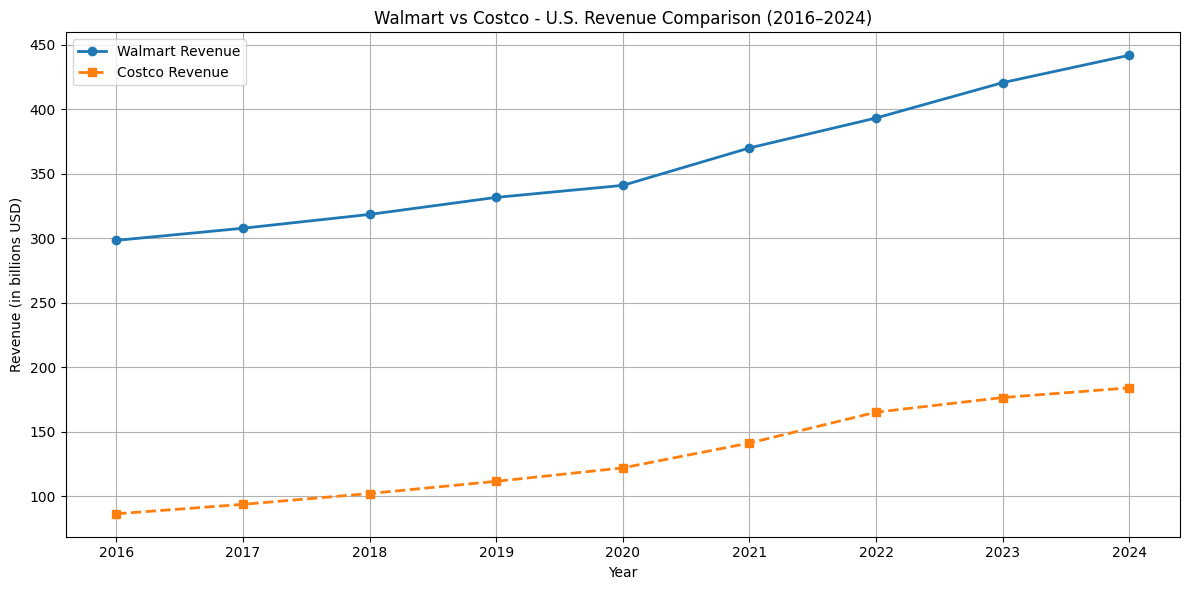

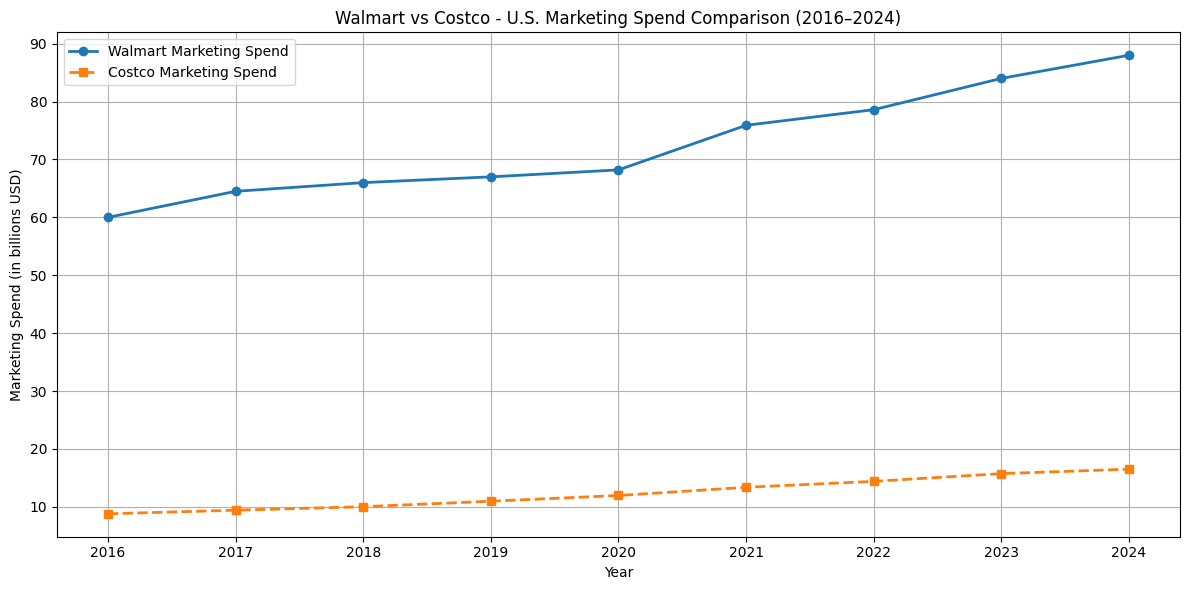

In [4]:
walmart_df = pd.read_csv("Walmart_US_Revenue_and_Marketing_2016_2025.csv")
costco_df = pd.read_csv("Costco_US_Revenue_and_Marketing_2015_2024.csv")

merged_df = pd.merge(walmart_df, costco_df, on="Year", how="inner")

plt.figure(figsize=(12, 6))
plt.plot(merged_df["Year"], merged_df["Walmart Revenue (in billions USD)"], marker='o', label="Walmart Revenue", linewidth=2)
plt.plot(merged_df["Year"], merged_df["Costco Revenue (in billions USD)"], marker='s', label="Costco Revenue", linestyle='--', linewidth=2)
plt.title("Walmart vs Costco - U.S. Revenue Comparison (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Revenue (in billions USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(merged_df["Year"], merged_df["Marketing Spend (in billions USD)_x"], marker='o', label="Walmart Marketing Spend", linewidth=2)
plt.plot(merged_df["Year"], merged_df["Marketing Spend (in billions USD)_y"], marker='s', label="Costco Marketing Spend", linestyle='--', linewidth=2)
plt.title("Walmart vs Costco - U.S. Marketing Spend Comparison (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Marketing Spend (in billions USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Walmart vs Costco - U.S. Market Share

### The dataset used is created from the company's 10-K filings.
#### The dataset has been uploaded to kaggle - https://www.kaggle.com/datasets/abdulkkhayyum519/walmart-and-costco-revenue-marketing-and-market-share/data?select=Walmart_Costco_US_Market_Share_2016_2024.csv
#### The code reads U.S. market share data for Walmart and Costco from 2016 to 2024 and plots their market share trends over the years.

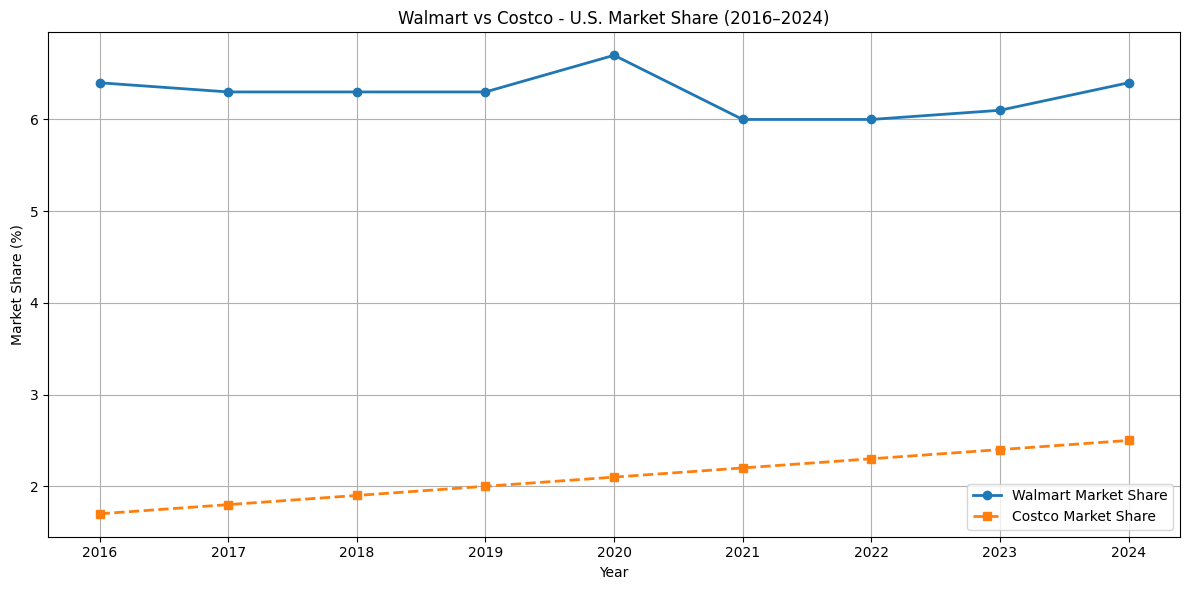

In [5]:
df = pd.read_csv("Walmart_Costco_US_Market_Share_2016_2024.csv")

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Walmart Market Share (%)"], marker='o', label="Walmart Market Share", linewidth=2)
plt.plot(df["Year"], df["Costco Market Share (%)"], marker='s', label="Costco Market Share", linestyle='--', linewidth=2)

plt.title("Walmart vs Costco - U.S. Market Share (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Comparable Sales Growth & Marketing Spend - Chipotle Case Study

### The dataset used is created from the company's 10-K filings.
#### The dataset has been uploaded to kaggle - https://www.kaggle.com/datasets/abdulkkhayyum519/chipotle-us-financial-data-20112022
#### The code reads Chipotle's financial data from 2011 to 2022, visualizes comparable sales growth with colored segments (crisis, recovery, and normal periods), overlays marketing spend as bars, and marks the 2016 E. coli outbreak with an annotation.

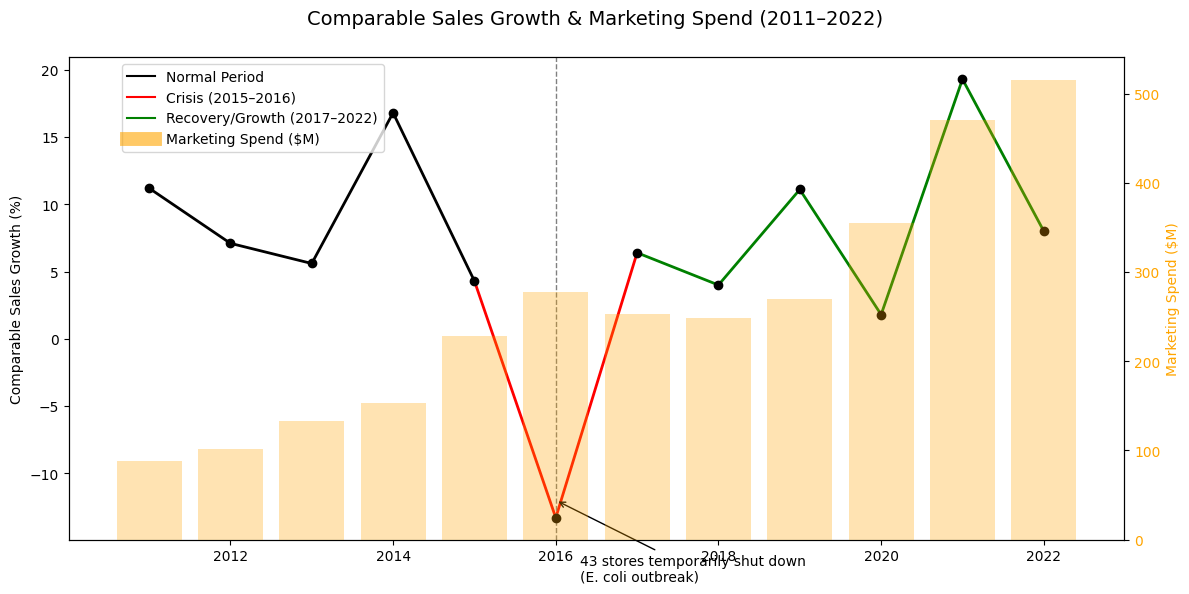

In [6]:
df = pd.read_csv("Chipotle_Financials_2011_2022.csv") 

fig, ax1 = plt.subplots(figsize=(12, 6))

for i in range(len(df) - 1):
    year_start = df["Year"][i]
    year_end = df["Year"][i + 1]
    growth_start = df["Comparable Sales Growth (%)"][i]
    growth_end = df["Comparable Sales Growth (%)"][i + 1]

    if 2015 <= year_start <= 2016:
        color = 'red'
    elif 2017 <= year_start <= 2022:
        color = 'green'
    else:
        color = 'black'

    ax1.plot([year_start, year_end], [growth_start, growth_end], color=color, linewidth=2)

ax1.scatter(df["Year"], df["Comparable Sales Growth (%)"], color='black', zorder=5)
ax1.set_ylabel('Comparable Sales Growth (%)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.bar(df["Year"], df["Marketing Spend ($M)"], alpha=0.3, color='orange')
ax2.set_ylabel('Marketing Spend ($M)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.axvline(x=2016, color='gray', linestyle='--', linewidth=1)
ax1.annotate(
    '43 stores temporarily shut down\n(E. coli outbreak)',
    xy=(2016, -12),
    xytext=(2016.3, -18),
    fontsize=10,
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    color='black'  
)

fig.suptitle('Comparable Sales Growth & Marketing Spend (2011–2022)', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

ax1.plot([], [], color='black', label='Normal Period')
ax1.plot([], [], color='red', label='Crisis (2015–2016)')
ax1.plot([], [], color='green', label='Recovery/Growth (2017–2022)')
ax1.plot([], [], color='orange', alpha=0.6, linewidth=10, label='Marketing Spend ($M)')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

# 5. McDonald's BTS Meal Campaign

### The dataset used is created from the company's 10-K filings and "McDonald's financial statements (2002-2022)" dataset from kaggle.
#### The dataset has been uploaded to kaggle - https://www.kaggle.com/datasets/abdulkkhayyum519/mcdonalds-comparable-sales-growth-20182023
#### The existing dataset - https://www.kaggle.com/datasets/mikhail1681/mcdonalds-financial-statements-2002-2022

#### The code reads McDonald's U.S. sales growth data (2018–2023), plots it with annotations, and highlights the 2021 "BTS Meal Campaign."

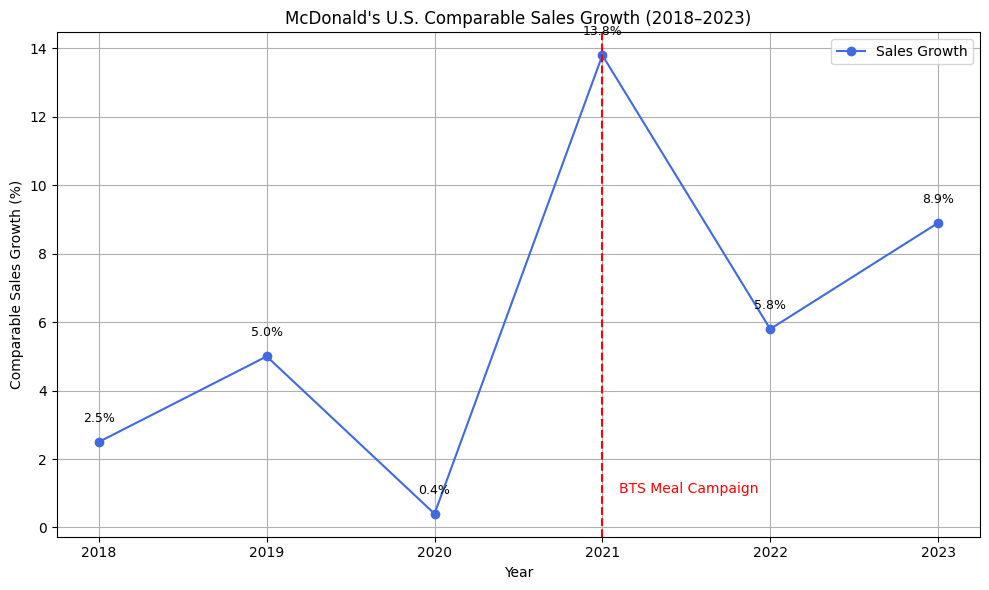

In [7]:
file_path = "US_Comparable_Sales_Growth_2018_2023.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["U.S. Comparable Sales Growth (%)"], marker='o', color='royalblue', label='Sales Growth')

for i in range(len(df)):
    plt.text(df["Year"][i], df["U.S. Comparable Sales Growth (%)"][i] + 0.5,
             f'{df["U.S. Comparable Sales Growth (%)"][i]}%', 
             ha='center', va='bottom', fontsize=9, color='black')

plt.axvline(x=2021, color='red', linestyle='--', linewidth=1.5)
plt.text(2021 + 0.1, 1, "BTS Meal Campaign", color='red', fontsize=10)

plt.title("McDonald's U.S. Comparable Sales Growth (2018–2023)")
plt.xlabel("Year")
plt.ylabel("Comparable Sales Growth (%)")
plt.grid(True)
plt.xticks(df["Year"])
plt.legend()
plt.tight_layout()
plt.show()

# 6. US Smartphone Market Share

### The dataset used is The dataset used is "Iphone Dataset" from Kaggle
#### https://www.kaggle.com/datasets/mohamedfahim003/global-iphone-and-smartphone-market-2011-2023



#### The code reads U.S. smartphone market share data, filters it for 2023, and visualizes iOS vs. Android market share with a pie chart.

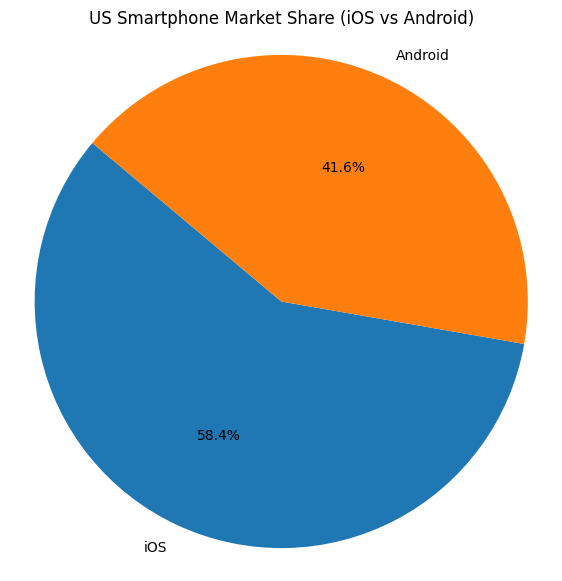

In [8]:
iphone_df = pd.read_csv("Iphone_Dataset.csv")

latest_year = iphone_df['Year'].max()
latest_data = iphone_df[iphone_df['Year'] == latest_year].iloc[0]

labels = ['iOS', 'Android']
sizes = [latest_data['iOS_Market_Share'], latest_data['Android_Market_Share']]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'US Smartphone Market Share (iOS vs Android)')
plt.axis('equal')  
plt.show()

# 7. Android Brand Market Share In USA

#### Here we used to same dataset "Iphone Dataset" from Kaggle

### https://www.kaggle.com/datasets/mohamedfahim003/global-iphone-and-smartphone-market-2011-2023

#### The code visualizes U.S. market distribution of major Android brands with a bar chart.

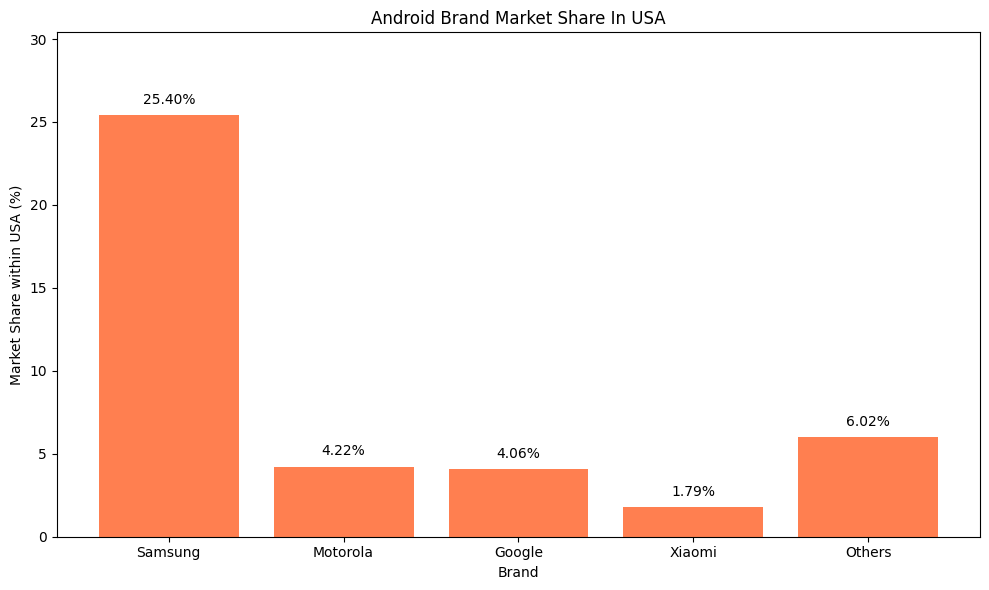

In [9]:
raw_shares = {
    'Samsung': 23.64,
    'Motorola': 3.93,
    'Google': 3.78,
    'Xiaomi': 1.67,
    'Others': 5.6
}

target_android_share = 41.5

total_raw = sum(raw_shares.values())
scaled_shares = {brand: (share / total_raw) * target_android_share for brand, share in raw_shares.items()}

plt.figure(figsize=(10, 6))
bars = plt.bar(scaled_shares.keys(), scaled_shares.values(), color='coral')
plt.title('Android Brand Market Share In USA')
plt.ylabel('Market Share within USA (%)')
plt.xlabel('Brand')
plt.ylim(0, max(scaled_shares.values()) + 5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 8. Annual Revenue Comparison in USA (Apple vs Samsung)

### The dataset used is created from the Apple company's 10-K filings.
#### The dataset has been uploaded to kaggle - https://www.kaggle.com/datasets/abdulkkhayyum519/apple-us-financial-data-20192024

### The dataset used is The dataset used is "Samsung Mobile Sales Dataset" from Kaggle
### https://www.kaggle.com/datasets/datatechexplorer/samsung-mobile-sales-dataset

#### The code reads annual revenue data for Apple and Samsung, converts it to billions, and visualizes the comparison using a dual-axis line chart.

In [10]:
import pandas as pd

df = pd.read_csv("Expanded_Dataset.csv")  

df_america = df[df["Region"] == "North America"]

revenue_by_year = df_america.groupby("Year")[["Revenue ($)"]].sum().reset_index()

revenue_by_year.to_csv("North_America_Revenue_By_Year.csv", index=False)

In [11]:
samsung_df = pd.read_csv("North_America_Revenue_By_Year.csv")
apple_df = pd.read_csv("Apple_Financials_2019_2024.csv")

samsung_df.rename(columns={"Revenue ($)": "Samsung Revenue ($)"}, inplace=True)
apple_df.rename(columns={"Fiscal Year": "Year", "Revenue (in billions USD)": "Apple Revenue ($)"}, inplace=True)

apple_df["Apple Revenue ($)"] = apple_df["Apple Revenue ($)"] * 1e9

samsung_df = samsung_df[["Year", "Samsung Revenue ($)"]]
apple_df = apple_df[["Year", "Apple Revenue ($)"]]

merged_df = pd.merge(samsung_df, apple_df, on="Year", how="inner")

merged_df.to_csv("Merged_Revenue_Comparison.csv", index=False)

print(merged_df)

   Year  Samsung Revenue ($)  Apple Revenue ($)
0  2019         1.484986e+09       2.601700e+11
1  2020         1.342878e+09       2.745200e+11
2  2021         6.999306e+08       3.658200e+11
3  2022         9.476023e+08       3.943300e+11
4  2023         1.020168e+09       3.832900e+11
5  2024         1.101508e+09       3.910400e+11


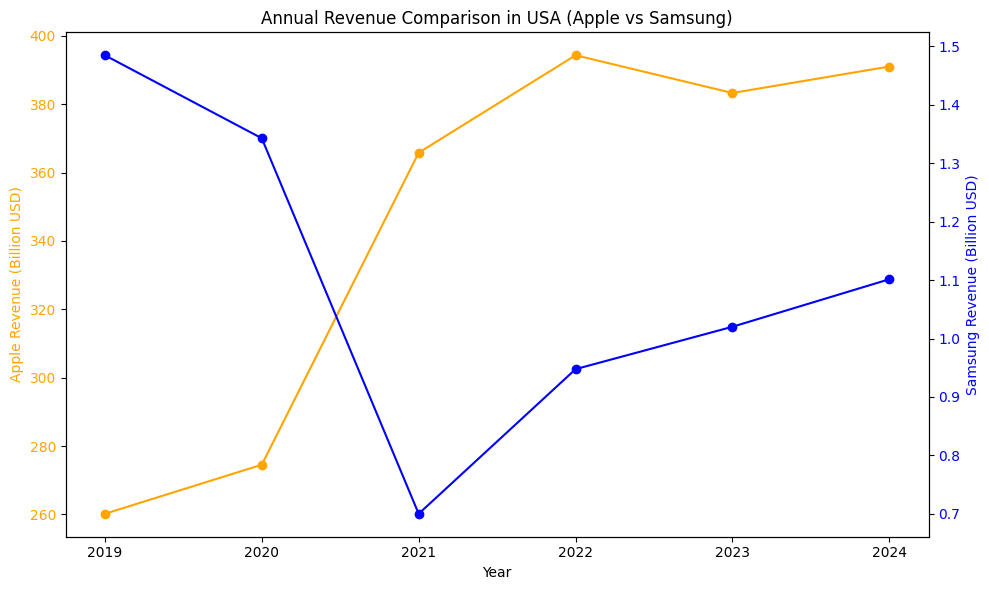

In [12]:
df = pd.read_csv("Merged_Revenue_Comparison.csv")

df["Samsung Revenue (Billion $)"] = df["Samsung Revenue ($)"] / 1e9
df["Apple Revenue (Billion $)"] = df["Apple Revenue ($)"] / 1e9

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Apple Revenue (Billion USD)", color="orange")
ax1.plot(df["Year"], df["Apple Revenue (Billion $)"], marker='o', color="orange", label="Apple")
ax1.tick_params(axis='y', labelcolor="orange")

ax2 = ax1.twinx()
ax2.set_ylabel("Samsung Revenue (Billion USD)", color="blue")
ax2.plot(df["Year"], df["Samsung Revenue (Billion $)"], marker='o', color="blue", label="Samsung")
ax2.tick_params(axis='y', labelcolor="blue")

plt.title("Annual Revenue Comparison in USA (Apple vs Samsung)")
fig.tight_layout()
plt.show()

# 9. Apple Revenue VS News Sentiment

### In this we have performed Web Scraping Using API of top headlines of Apple product to comapre it Apple's annual revenue using sentiment analysis to find if Public Sentiment actually affects the marketing strategies of the company.
#### The dataset has been uploaded to kaggle - https://www.kaggle.com/datasets/abdulkkhayyum519/nyt-apple-related-news-articles-dataset

### The dataset used is created from the Apple company's 10-K filings and Headlines extracted from New york times website.


#### The code reads Apple's annual revenue data and analyzes sentiment from news headlines using VADER sentiment analysis. It merges both datasets, plots revenue and average sentiment on dual axes, and annotates significant events for each year from 2019 to 2024.

In [ ]:
import requests
import pandas as pd
import time

API_KEY = 'daoGx5lOPDi0O8k8fGjOSm0NJkjeSDaz'  

SEARCH_TERMS = [
    "apple sales spike",
    "apple sale drop"
]

BASE_URL = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

BEGIN_DATE = "20080101"  
END_DATE = "20250427"   

SLEEP_BETWEEN_REQUESTS = 9
SLEEP_AFTER_BATCH = 75
BATCH_SIZE = 10

all_articles = []
total_requests = 0

def scrape_articles_for_term(term):
    global total_requests
    term_articles = []
    page = 0
    
    while True:
        params = {
            'q': term,
            'api-key': API_KEY,
            'begin_date': BEGIN_DATE,
            'end_date': END_DATE,
            'page': page
        }
        response = requests.get(BASE_URL, params=params)

        if response.status_code == 429:
            print(f"Rate limit hit. Sleeping for 90 seconds...")
            time.sleep(90)
            continue

        if response.status_code != 200:
            print(f"Error: {response.status_code} on page {page}. Stopping for {term}.")
            break
        
        data = response.json()
        docs = data['response']['docs']

        if not docs:
            print(f"No more articles for '{term}' at page {page}.")
            break
        
        for doc in docs:
            headline = doc.get('headline', {}).get('main', '')
            snippet = doc.get('snippet', '')
            pub_date = doc.get('pub_date', '')[:10]

            term_articles.append({
                'search_term': term.replace('"', ''),
                'pub_date': pub_date,
                'headline': headline,
                'snippet': snippet
            })

        page += 1
        total_requests += 1

        print(f"Fetched page {page} for '{term}'. Total requests: {total_requests}")

        time.sleep(SLEEP_BETWEEN_REQUESTS)

        if total_requests % BATCH_SIZE == 0:
            print(f"Batch of {BATCH_SIZE} requests completed. Sleeping for {SLEEP_AFTER_BATCH} seconds...")
            time.sleep(SLEEP_AFTER_BATCH)
        
        if total_requests >= 3900:
            print("Approaching daily limit (3900 requests). Stopping scrape to avoid ban.")
            break

    return term_articles

for term in SEARCH_TERMS:
    articles = scrape_articles_for_term(term)
    all_articles.extend(articles)
    print(f"Total articles fetched so far: {len(all_articles)}")

df = pd.DataFrame(all_articles)
df = df.drop_duplicates(subset=['headline', 'snippet', 'pub_date'])

df['search_term'] = pd.Categorical(df['search_term'], categories=SEARCH_TERMS, ordered=True)
df = df.sort_values(by=['search_term', 'pub_date']).reset_index(drop=True)

df.to_csv('nyt_apple_related_news.csv', index=False)

print(f"\n✅ Scraping complete!")
print(f"✅ Total unique articles saved: {len(df)}")
print(f"✅ Saved to: nyt_apple_related_news.csv")


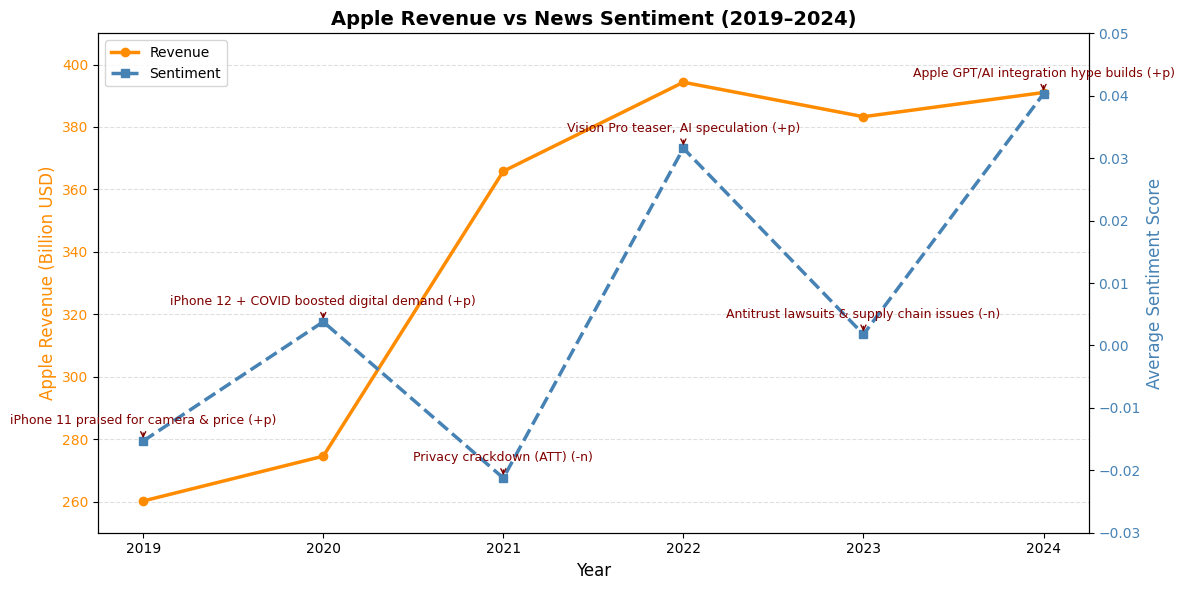

In [15]:
nyt_df = pd.read_csv("nyt_apple_related_news.csv")
nyt_df['pub_date'] = pd.to_datetime(nyt_df['pub_date'])
nyt_df['year'] = nyt_df['pub_date'].dt.year

analyzer = SentimentIntensityAnalyzer()
nyt_df['compound'] = nyt_df['headline'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])

sentiment_by_year = nyt_df.groupby('year')['compound'].mean().reset_index()
sentiment_by_year.rename(columns={'compound': 'Avg_Sentiment'}, inplace=True)

revenue_df = pd.read_csv("Apple_Financials_2019_2024.csv")
revenue_df.rename(columns={
    'Fiscal Year': 'year',
    'Revenue (in billions USD)': 'Apple_Revenue_Billion'
}, inplace=True)

merged_df = pd.merge(sentiment_by_year, revenue_df, on='year', how='inner')

events = {
    2019: "iPhone 11 praised for camera & price (+p)",
    2020: "iPhone 12 + COVID boosted digital demand (+p)",
    2021: "Privacy crackdown (ATT) (-n)",
    2022: "Vision Pro teaser, AI speculation (+p)",
    2023: "Antitrust lawsuits & supply chain issues (-n)",
    2024: "Apple GPT/AI integration hype builds (+p)"
}

fig, ax1 = plt.subplots(figsize=(12, 6))

color_revenue = 'darkorange'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Apple Revenue (Billion USD)', color=color_revenue, fontsize=12)
ax1.plot(merged_df['year'], merged_df['Apple_Revenue_Billion'], marker='o', color=color_revenue,
         linewidth=2.5, label='Revenue')
ax1.tick_params(axis='y', labelcolor=color_revenue)
ax1.set_ylim(250, 410)

ax2 = ax1.twinx()
color_sentiment = 'steelblue'
ax2.set_ylabel('Average Sentiment Score', color=color_sentiment, fontsize=12)
ax2.plot(merged_df['year'], merged_df['Avg_Sentiment'], marker='s', linestyle='--', color=color_sentiment,
         linewidth=2.5, label='Sentiment')
ax2.tick_params(axis='y', labelcolor=color_sentiment)
ax2.set_ylim(-0.03, 0.05)

for year, event in events.items():
    if year in merged_df['year'].values:
        x = year
        y2 = merged_df.loc[merged_df['year'] == year, 'Avg_Sentiment'].values[0]

        ax2.annotate(event, (x, y2), textcoords="offset points", xytext=(0, 12), ha='center',
                     fontsize=9, color='maroon', arrowprops=dict(arrowstyle='->', color='maroon', lw=1))

plt.title('Apple Revenue vs News Sentiment (2019–2024)',
          fontsize=14, fontweight='bold')
fig.tight_layout()
ax1.grid(axis='y', linestyle='--', alpha=0.4)

lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left', frameon=True)

plt.show()

# 10. Samsung Revenue vs News Sentiment

### In this we have performed Web Scraping Using API of top headlines of Samsung product to comapre it Samsung's annual revenue using sentiment analysis to find if Public Sentiment actually affects the marketing strategies of the company.
#### The dataset has been uploaded to kaggle - https://www.kaggle.com/datasets/abdulkkhayyum519/samsung-news-headlines

### The dataset used is The dataset used is "Samsung Mobile Sales Dataset" from Kaggle for Annual Revenue
### https://www.kaggle.com/datasets/datatechexplorer/samsung-mobile-sales-dataset

#### The code reads Samsung's annual revenue data and analyzes sentiment from news headlines using VADER sentiment analysis. It merges both datasets, plots revenue and average sentiment on dual axes, and annotates significant events for each year from 2019 to 2024.

In [ ]:
import requests
import pandas as pd
import time

API_KEY = 'daoGx5lOPDi0O8k8fGjOSm0NJkjeSDaz'  
SEARCH_TERMS = [
    "samsung sales spike",
    "samsung profit beats",
]

BASE_URL = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

BEGIN_DATE = "20080101"
END_DATE = "20250427"

SLEEP_BETWEEN_REQUESTS = 9
SLEEP_AFTER_BATCH = 75
BATCH_SIZE = 10

all_articles = []
total_requests = 0

def scrape_articles_for_term(term):
    global total_requests
    term_articles = []
    page = 0
    
    while True:
        params = {
            'q': term,
            'api-key': API_KEY,
            'begin_date': BEGIN_DATE,
            'end_date': END_DATE,
            'page': page
        }
        response = requests.get(BASE_URL, params=params)

        if response.status_code == 429:
            print(f"Rate limit hit. Sleeping for 90 seconds...")
            time.sleep(90)
            continue

        if response.status_code != 200:
            print(f"Error: {response.status_code} on page {page}. Stopping for {term}.")
            break
        
        data = response.json()
        docs = data['response']['docs']

        if not docs:
            print(f"No more articles for '{term}' at page {page}.")
            break
        
        for doc in docs:
            headline = doc.get('headline', {}).get('main', '')
            snippet = doc.get('snippet', '')
            pub_date = doc.get('pub_date', '')[:10]

            term_articles.append({
                'search_term': term,
                'pub_date': pub_date,
                'headline': headline,
                'snippet': snippet
            })

        page += 1
        total_requests += 1

        print(f"Fetched page {page} for '{term}'. Total requests: {total_requests}")

        time.sleep(SLEEP_BETWEEN_REQUESTS)

        if total_requests % BATCH_SIZE == 0:
            print(f"Batch of {BATCH_SIZE} requests completed. Sleeping for {SLEEP_AFTER_BATCH} seconds...")
            time.sleep(SLEEP_AFTER_BATCH)
        
        if total_requests >= 3900:
            print("Approaching daily limit (3900 requests). Stopping scrape to avoid ban.")
            break

    return term_articles

for term in SEARCH_TERMS:
    articles = scrape_articles_for_term(term)
    all_articles.extend(articles)
    print(f"Total articles fetched so far: {len(all_articles)}")

df = pd.DataFrame(all_articles)
df = df.drop_duplicates(subset=['headline', 'snippet', 'pub_date'])

df['search_term'] = pd.Categorical(df['search_term'], categories=SEARCH_TERMS, ordered=True)
df = df.sort_values(by=['search_term', 'pub_date']).reset_index(drop=True)

df.to_csv('mightymerge.csv', index=False)

print(f"\n✅ Scraping complete!")
print(f"✅ Total unique articles saved: {len(df)}")
print(f"✅ Saved to: mightymerge.csv")


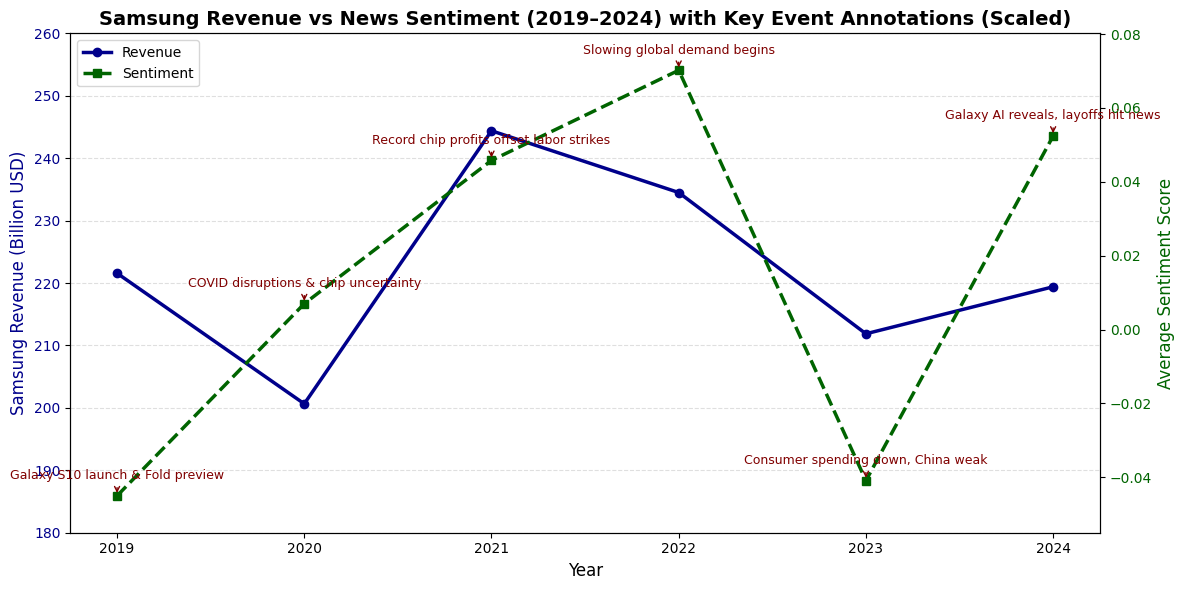

In [16]:
file_path = "mightymerge.csv" 
df = pd.read_csv(file_path, skiprows=4)
df['pub_date'] = pd.to_datetime(df['pub_date'])
df['year'] = df['pub_date'].dt.year


analyzer = SentimentIntensityAnalyzer()
df['compound'] = df['headline'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])

sentiment_by_year = df.groupby('year')['compound'].mean().round(4).reset_index()
sentiment_by_year.rename(columns={'compound': 'Avg_Sentiment'}, inplace=True)

revenue_data = {
    'year': [2019, 2020, 2021, 2022, 2023, 2024],
    'Samsung_Revenue_Billion': [221.57, 200.65, 244.39, 234.5, 211.87, 219.4]
}
revenue_df = pd.DataFrame(revenue_data)

merged_df = pd.merge(sentiment_by_year, revenue_df, on='year', how='inner')

events = {
    2019: "Galaxy S10 launch & Fold preview",
    2020: "COVID disruptions & chip uncertainty",
    2021: "Record chip profits offset labor strikes",
    2022: "Slowing global demand begins",
    2023: "Consumer spending down, China weak",
    2024: "Galaxy AI reveals, layoffs hit news"
}

s_min, s_max = merged_df['Avg_Sentiment'].min(), merged_df['Avg_Sentiment'].max()
s_range = (s_min - 0.01, s_max + 0.01)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Samsung Revenue (Billion USD)', color='darkblue', fontsize=12)
ax1.plot(merged_df['year'], merged_df['Samsung_Revenue_Billion'], marker='o', color='darkblue',
         linewidth=2.5, label='Revenue')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.set_ylim(180, 260)

ax2 = ax1.twinx()
ax2.set_ylabel('Average Sentiment Score', color='darkgreen', fontsize=12)
ax2.plot(merged_df['year'], merged_df['Avg_Sentiment'], marker='s', linestyle='--', color='darkgreen',
         linewidth=2.5, label='Sentiment')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax2.set_ylim(s_range)

for year, event in events.items():
    if year in merged_df['year'].values:
        y_val = merged_df.loc[merged_df['year'] == year, 'Avg_Sentiment'].values[0]
        ax2.annotate(event, (year, y_val), textcoords="offset points", xytext=(0, 12), ha='center',
                     fontsize=9, color='maroon', arrowprops=dict(arrowstyle='->', lw=1, color='maroon'))

plt.title('Samsung Revenue vs News Sentiment (2019–2024) with Key Event Annotations (Scaled)',
          fontsize=14, fontweight='bold')
fig.tight_layout()
ax1.grid(axis='y', linestyle='--', alpha=0.4)

lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

plt.show()


In [20]:
!jupyter nbconvert --to webpdf "Advanced Programming Code2.ipynb"

[NbConvertApp] Converting notebook Advanced Programming Code2.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 833503 bytes to Advanced Programming Code2.pdf
